<a href="https://colab.research.google.com/github/teju1001/textgen/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('indian')
nltk.download('stopwords')
nltk.download('punkt')

! pip install stanza
import stanza
stanza.download('hi')
nlp = stanza.Pipeline('hi')

[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 691 kB 5.5 MB/s 
     |████████████████████████████████| 240 kB 52.8 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=0d8ffa6dd579ab6c11ed88f1f883d8d6258776db878224e109cda70d683ca42d
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


INFO:stanza:Downloading default packages for language: hi (Hindi) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: hi (Hindi):
| Processor | Package |
-----------------------
| tokenize  | hdtb    |
| pos       | hdtb    |
| lemma     | hdtb    |
| depparse  | hdtb    |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


# ***DATA***

In [ ]:
f1 = open("/content/drive/MyDrive/dataset/hdataset.txt",encoding="utf8")
text = f1.read()
f1.close()

In [ ]:
text[:200]

'अगर भारत के संदर्भ में बात की जाए तो भारत एक विविध संस्कृति वाला देश है, एक तथ्य कि यहाँ यह बात इसके लोगों, संस्कृति और मौसम में भी प्रमुखता से दिखाई देती है। हिमालय की अनश्वर बर्फ से लेकर दक्षिण के द'

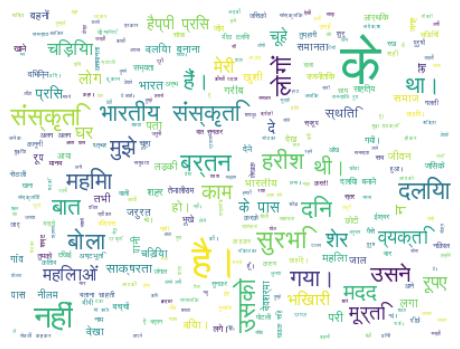

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

font="/content/drive/MyDrive/dataset/gargi.ttf"
wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    stopwords=stopwordshin,
    background_color="white",
    regexp=r"[\u0900-\u097F]+", 
    font_path=font
).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
f1 = open("/content/drive/MyDrive/dataset/final_stopwords.txt",encoding="utf8")
sw = f1.read()
f1.close()
stopwordshin=sw.split("\n")
print(stopwordshin,len(stopwordshin),sep="\n")

['मैं', 'मुझको', 'मेरा', 'अपने आप को', 'हमने', 'हमारा', 'अपना', 'हम', 'आप', 'आपका', 'तुम्हारा', 'अपने आप', 'स्वयं', 'वह', 'इसे', 'उसके', 'खुद को', 'कि वह', 'उसकी', 'उसका', 'खुद ही', 'यह', 'इसके', 'उन्होने', 'अपने', 'क्या', 'जो', 'किसे', 'किसको', 'कि', 'ये', 'हूँ', 'होता है', 'रहे', 'थी', 'थे', 'होना', 'गया', 'किया जा रहा है', 'किया है', 'है', 'पडा', 'होने', 'करना', 'करता है', 'किया', 'रही', 'एक', 'लेकिन', 'अगर', 'या', 'क्यूंकि', 'जैसा', 'जब तक', 'जबकि', 'की', 'पर', 'द्वारा', 'के लिए', 'साथ', 'के बारे में', 'खिलाफ', 'बीच', 'में', 'के माध्यम से', 'दौरान', 'से पहले', 'के बाद', 'ऊपर', 'नीचे', 'को', 'से', 'तक', 'से नीचे', 'करने में', 'निकल', 'बंद', 'से अधिक', 'तहत', 'दुबारा', 'आगे', 'फिर', 'एक बार', 'यहाँ', 'वहाँ', 'कब', 'कहाँ', 'क्यों', 'कैसे', 'सारे', 'किसी', 'दोनो', 'प्रत्येक', 'ज्यादा', 'अधिकांश', 'अन्य', 'में कुछ', 'ऐसा', 'में कोई', 'मात्र', 'खुद', 'समान', 'इसलिए', 'बहुत', 'सकता', 'जायेंगे', 'जरा', 'चाहिए', 'अभी', 'और', 'कर दिया', 'रखें', 'का', 'हैं', 'इस', 'होता', 'करने', 'ने', 'बनी',

# ***POS TAGGING***

In [ ]:
import nltk
import re
from nltk.tag import tnt
from nltk.corpus import indian

model_path = "/content/drive/MyDrive/dataset/hindi.pos" #Copy hindi.pos from NLTK corpus

def train_hindi_model(model_path):
    train_data = indian.tagged_sents(model_path)
    tnt_pos_tagger = tnt.TnT()
    tnt_pos_tagger.train(train_data)
    return tnt_pos_tagger

def tag_words(model,text):
    tagged = (model.tag(nltk.word_tokenize(text)))
    return tagged


def handle_UNK(tagged_words):
  result_list = []
  for nep_word, tag in tagged_words:
    if tag == "Unk":
      x= nlp(nep_word)
      y=(x.to_dict()[0][0]['upos'])
      result_list.append([nep_word,y])
    else:
      result_list.append([nep_word,tag])
  return (result_list)

posmodel = train_hindi_model(model_path)

In [ ]:
t1="अगर भारत के संदर्भ में बात की जाए तो भारत एक विविध संस्कृति वाला देश है"
tagged_words= tag_words(posmodel,t1)
newtag=handle_UNK(tagged_words)
print(newtag)

[['अगर', 'SCONJ'], ['भारत', 'NNP'], ['के', 'PREP'], ['संदर्भ', 'NOUN'], ['में', 'PREP'], ['बात', 'NN'], ['की', 'VFM'], ['जाए', 'VAUX'], ['तो', 'CC'], ['भारत', 'NNP'], ['एक', 'QFNUM'], ['विविध', 'ADJ'], ['संस्कृति', 'NOUN'], ['वाला', 'NNP'], ['देश', 'NN'], ['है', 'VFM']]


# ***PREPROCESSING***

In [ ]:
def mytokenizer(ttext):
  tsl = re.sub('([!?.,:।])', "$", ttext)
  newtsl=tsl.split('$')
  return newtsl

In [ ]:
sentences = mytokenizer(text)
print(*sentences[:5],len(sentences),sep="\n")

अगर भारत के संदर्भ में बात की जाए तो भारत एक विविध संस्कृति वाला देश है
 एक तथ्य कि यहाँ यह बात इसके लोगों
 संस्कृति और मौसम में भी प्रमुखता से दिखाई देती है
 हिमालय की अनश्वर बर्फ से लेकर दक्षिण के दूर दराज में खेतों तक
 पश्चिम के रेगिस्तान से पूर्व के नम डेल्टा तक
529


In [ ]:
import re
def text_cleaner(texts):
    newString = texts
    # remove punctuations, english words and numbers
    newString = re.sub("([-%!#?,.:'‘’।])", " ", newString)
    newString = re.sub("[a-zA-Z]", " ", newString)
    newString = re.sub("[0-9]", " ", newString)
    long_words=[]
    # remove single characters
    for i in newString.split():
        if len(i)>=1:                  
            long_words.append(i)
    return (" ".join(long_words)).strip()

for i in range(len(sentences)):
    sentences[i]=text_cleaner(sentences[i])
cleansent=[]
for x in range(len(sentences)):
  if len(sentences[x].split(" "))>3:
    cleansent.append(sentences[x])

In [ ]:
cleansent[:5]

['अगर भारत के संदर्भ में बात की जाए तो भारत एक विविध संस्कृति वाला देश है',
 'एक तथ्य कि यहाँ यह बात इसके लोगों',
 'संस्कृति और मौसम में भी प्रमुखता से दिखाई देती है',
 'हिमालय की अनश्वर बर्फ से लेकर दक्षिण के दूर दराज में खेतों तक',
 'पश्चिम के रेगिस्तान से पूर्व के नम डेल्टा तक']

In [ ]:
def poslist(x):
  tagged_words= tag_words(posmodel,x)
  newtag=handle_UNK(tagged_words)
  # taglist=[]
  # for x in newtag:taglist.append(x[1])
  return newtag

possent=[[0]]*len(cleansent)
for z in range(len(cleansent)):possent[z] = poslist(cleansent[z])


In [ ]:
print(*possent[:10],sep="\n")

[['अगर', 'SCONJ'], ['भारत', 'NNP'], ['के', 'PREP'], ['संदर्भ', 'NOUN'], ['में', 'PREP'], ['बात', 'NN'], ['की', 'VFM'], ['जाए', 'VAUX'], ['तो', 'CC'], ['भारत', 'NNP'], ['एक', 'QFNUM'], ['विविध', 'ADJ'], ['संस्कृति', 'NOUN'], ['वाला', 'NNP'], ['देश', 'NN'], ['है', 'VFM']]
[['एक', 'QFNUM'], ['तथ्य', 'NN'], ['कि', 'CC'], ['यहाँ', 'PRON'], ['यह', 'PRP'], ['बात', 'NN'], ['इसके', 'PRP'], ['लोगों', 'NN']]
[['संस्कृति', 'NOUN'], ['और', 'CC'], ['मौसम', 'NNC'], ['में', 'PREP'], ['भी', 'RP'], ['प्रमुखता', 'NOUN'], ['से', 'PREP'], ['दिखाई', 'VFM'], ['देती', 'VAUX'], ['है', 'VAUX']]
[['हिमालय', 'PROPN'], ['की', 'PREP'], ['अनश्वर', 'PROPN'], ['बर्फ', 'NOUN'], ['से', 'PREP'], ['लेकर', 'VRB'], ['दक्षिण', 'JJ'], ['के', 'PREP'], ['दूर', 'NVB'], ['दराज', 'NOUN'], ['में', 'PREP'], ['खेतों', 'NOUN'], ['तक', 'PREP']]
[['पश्चिम', 'PROPN'], ['के', 'PREP'], ['रेगिस्तान', 'NOUN'], ['से', 'PREP'], ['पूर्व', 'PREP'], ['के', 'PREP'], ['नम', 'PROPN'], ['डेल्टा', 'PROPN'], ['तक', 'PREP']]
[['सूखी', 'VERB'], ['गर्मी',

###***Tags :*** 
ADJ,ADV,NOUN,VERB,VB,VBD,VBG,VBN,VBP,RB,NN,NNP,NNS,NNPS,JJ,JJR,JJS,VAUX

*   **Noun** - NOUN,NN,NNP,NNS,NNPS,PROPN
*   **Adjective** - ADJ,JJ,JJR,JJS
*   **Adverb** - ADV,RB
*   **Verb** - VERB,VB,VBD,VBG,VBN,VBP
*   **Ending(tense)** - VAUX

In [ ]:
noun = ['NOUN','NN','NNP','NNS','NNPS','PROPN']
adj = ['ADJ','JJ','JJR','JJS']
adverb = ['ADV','RB']
verb = ['VERB','VB','VBD','VBG','VBN','VBP']
vaux = ['VAUX']
def keywords_extraction(tag_list):
  keywordlst=[] #used as None
  for x in tag_list:
    if x[1] in noun:
      keywordlst.append(x[0])
  for x in tag_list:
    if x[1] in adj:
      keywordlst.append(x[0])
  for x in tag_list:
    if x[1] in adverb:
      keywordlst.append(x[0])
  for x in tag_list:
    if x[1] in verb:
      keywordlst.append(x[0])
  for x in tag_list:
    if x[1] in vaux:
      keywordlst.append(x[0])

  return keywordlst


In [ ]:
keywordslist=[[0]]*len(possent)
for y in range(len(possent)):keywordslist[y]=keywords_extraction(possent[y])

In [ ]:
# keywordslist[:10]
for x in range(len(keywordslist)):keywordslist[x]=" ".join(keywordslist[x])
keywordslist[:10]

In [ ]:
for x in range(len(possent)):
  zs=[]
  for y in possent[x]:zs.append(y[1])
  possent[x]=" ".join(zs)
possent[:10]

In [ ]:
st=[]
for x in possent:
  st.append(len(x))
print(max(st))
s=[]
for x in keywordslist:
  s.append(len(x))
print(max(s))

In [ ]:
x=list(range(len(st)))
plt.plot(x, st)
plt.show()

In [ ]:
import pandas as pd

# ADJ,ADV,NOUN,VERB,VB,VBD,VBG,VBN,VBP,RB,NN,NNP,NNS,NNPS,JJ,JJR,JJS,VAUX

# Noun - NOUN,NN,NNP,NNS,NNPS
# Adjective - ADJ,JJ,JJR,JJS
# Adverb - ADV,RB
# Verb - VERB,VB,VBD,VBG,VBN,VBP
# Ending(tense) - VAUX

In [ ]:
import pandas as pd

df = pd.DataFrame(list(zip(cleansent,possent,keywordslist)),
               columns =['sentences', 'postag','keywords'])
df.to_csv('/content/drive/MyDrive/dataset/dataset.csv',index=False)

# ***Training***

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/dataset.csv')
data.head()

,sentences,postag,keywords
0,अगर भारत के संदर्भ में बात की जाए तो भारत एक व...,SCONJ NNP PREP NOUN PREP NN VFM VAUX CC NNP QF...,भारत संदर्भ बात भारत संस्कृति वाला देश विविध जाए
1,एक तथ्य कि यहाँ यह बात इसके लोगों,QFNUM NN CC PRON PRP NN PRP NN,तथ्य बात लोगों
2,संस्कृति और मौसम में भी प्रमुखता से दिखाई देती है,NOUN CC NNC PREP RP NOUN PREP VFM VAUX VAUX,संस्कृति प्रमुखता देती है
3,हिमालय की अनश्वर बर्फ से लेकर दक्षिण के दूर दर...,PROPN PREP PROPN NOUN PREP VRB JJ PREP NVB NOU...,हिमालय अनश्वर बर्फ दराज खेतों दक्षिण
4,पश्चिम के रेगिस्तान से पूर्व के नम डेल्टा तक,PROPN PREP NOUN PREP PREP PREP PROPN PROPN PREP,पश्चिम रेगिस्तान नम डेल्टा


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.utils import to_categorical 
from tensorflow. keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding 
from tensorflow.keras.preprocessing. sequence import pad_sequences

In [ ]:
def graphoflength(lis):
  stf=[]
  for x in lis:
    stf.append(len(x))

  x=list(range(len(stf)))
  plt.plot(x, stf)
  plt.show()

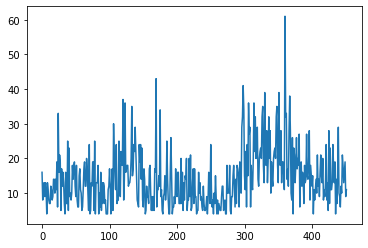

In [ ]:
newsent=[]
for x in data.sentences:
  newsent.append(x.split(" "))

graphoflength(newsent)

In [ ]:
print(*newsent[:10],sep="\n")

['अगर', 'भारत', 'के', 'संदर्भ', 'में', 'बात', 'की', 'जाए', 'तो', 'भारत', 'एक', 'विविध', 'संस्कृति', 'वाला', 'देश', 'है']
['एक', 'तथ्य', 'कि', 'यहाँ', 'यह', 'बात', 'इसके', 'लोगों']
['संस्कृति', 'और', 'मौसम', 'में', 'भी', 'प्रमुखता', 'से', 'दिखाई', 'देती', 'है']
['हिमालय', 'की', 'अनश्वर', 'बर्फ', 'से', 'लेकर', 'दक्षिण', 'के', 'दूर', 'दराज', 'में', 'खेतों', 'तक']
['पश्चिम', 'के', 'रेगिस्तान', 'से', 'पूर्व', 'के', 'नम', 'डेल्टा', 'तक']
['सूखी', 'गर्मी', 'से', 'लेकर', 'पहाड़ियों', 'की', 'तराई', 'के', 'मध्य', 'पठार', 'की', 'ठंडक', 'तक']
['भारतीय', 'जीवनशैलियाँ', 'इसके', 'भूगोल', 'की', 'भव्यता', 'स्पष्ट', 'रूप', 'से', 'दर्शाती', 'है']
['एक', 'भारतीय', 'के', 'परिधान']
['योजना', 'और', 'आदतें', 'इसके', 'उद्भव', 'के', 'स्थान', 'के', 'अनुसार', 'अलग', 'अलग', 'होते', 'हैं']
['भारती', 'संस्कृति', 'अपनी', 'विशाल', 'भौगोलिक', 'स्थिति', 'के', 'समान', 'अलग', 'अलग', 'है']


In [ ]:
## Embedding
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(data.sentences) 
toksent = tokenizer.texts_to_sequences(newsent)

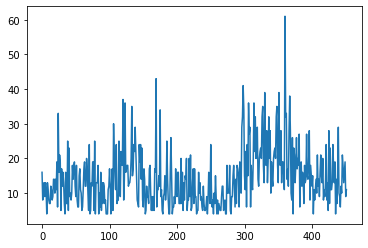

In [ ]:
newkw=[]
for x in data.sentences:
  newkw.append(x.split(" "))

graphoflength(newkw)

In [ ]:
tokkw = tokenizer.texts_to_sequences(newkw)

In [ ]:
print(newkw[2],tokkw[2],sep="\n")

['संस्कृति', 'और', 'मौसम', 'में', 'भी', 'प्रमुखता', 'से', 'दिखाई', 'देती', 'है']
[17, 7, 436, 4, 18, 665, 5, 221, 331, 2]


In [ ]:
stf=[]
for x in tokkw:
  stf.append(len(x))
print(min(stf))

4


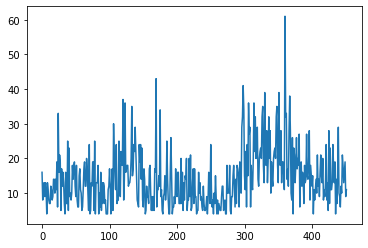

In [ ]:
newpossent=[]
for x in data.sentences:
  newpossent.append(x.split(" "))
graphoflength(newpossent)

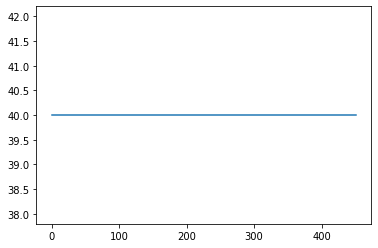

In [ ]:
newtoksent=[]
for x in toksent:
  newtoksent.append(x[:40]+[0]*(40-len(x)))

stf=[]
for x in newtoksent:
  stf.append(len(x))

x=list(range(len(stf)))
plt.plot(x, stf)
plt.show()

In [ ]:
print(newtoksent[:10])

[[264, 99, 1, 329, 4, 33, 3, 219, 21, 99, 11, 663, 17, 330, 265, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [11, 664, 34, 220, 12, 33, 83, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [17, 7, 436, 4, 18, 665, 5, 221, 331, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [666, 3, 667, 668, 5, 84, 669, 1, 135, 670, 4, 671, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [672, 1, 673, 5, 332, 1, 674, 675, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [676, 677, 5, 84, 678, 3, 679, 1, 333, 680, 3, 681, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [30, 682, 83, 683, 3, 684, 437, 91, 5, 685, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [11, 30, 1, 686, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
tokkw[:4]

[[264, 99, 1, 329, 4, 33, 3, 219, 21, 99, 11, 663, 17, 330, 265, 2],
 [11, 664, 34, 220, 12, 33, 83, 39],
 [17, 7, 436, 4, 18, 665, 5, 221, 331, 2],
 [666, 3, 667, 668, 5, 84, 669, 1, 135, 670, 4, 671, 107]]

In [ ]:
def keywordinput(klist,toksent):
  y_out=[]
  x_in=[]
  for x in range(len(toksent)):
    for y in range(len(klist[x])-3):
        y_out.append(toksent[x])
        x_in.append(klist[x][y:y+4])
  return x_in,y_out
    

X_1,Y_1 = keywordinput(tokkw[:400],newtoksent[:400])

In [ ]:
len(Y_1)

4543

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

1478

In [ ]:
seq_length=len(X_1[0])
seq_length

4

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 4 , input_length = seq_length))
model.add(Dense(50 , activation = 'relu'))
model.add(Dense(50 , activation = 'relu'))
model.add(Dense (50 , activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 4, 4)              5912      
                                                                 
 dense_6 (Dense)             (None, 4, 50)             250       
                                                                 
 dense_7 (Dense)             (None, 4, 50)             2550      
                                                                 
 dense_8 (Dense)             (None, 4, 50)             2550      
                                                                 
Total params: 11,262
Trainable params: 11,262
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
model.fit (X_1 , Y_1 , batch_size =32 , epochs = 100)

# ***Results***

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/dataset.csv')
data.head()

,sentences,postag,keywords
0,अगर भारत के संदर्भ में बात की जाए तो भारत एक व...,SCONJ NNP PREP NOUN PREP NN VFM VAUX CC NNP QF...,भारत संदर्भ बात भारत संस्कृति वाला देश विविध जाए
1,एक तथ्य कि यहाँ यह बात इसके लोगों,QFNUM NN CC PRON PRP NN PRP NN,तथ्य बात लोगों
2,संस्कृति और मौसम में भी प्रमुखता से दिखाई देती है,NOUN CC NNC PREP RP NOUN PREP VFM VAUX VAUX,संस्कृति प्रमुखता देती है
3,हिमालय की अनश्वर बर्फ से लेकर दक्षिण के दूर दर...,PROPN PREP PROPN NOUN PREP VRB JJ PREP NVB NOU...,हिमालय अनश्वर बर्फ दराज खेतों दक्षिण
4,पश्चिम के रेगिस्तान से पूर्व के नम डेल्टा तक,PROPN PREP NOUN PREP PREP PREP PROPN PROPN PREP,पश्चिम रेगिस्तान नम डेल्टा


In [ ]:
postags = data['postag']

In [ ]:
noun = ['NOUN','NN','NNP','NNS','NNPS','PROPN']
adj = ['ADJ','JJ','JJR','JJS']
adverb = ['ADV','RB']
verb = ['VERB','VB','VBD','VBG','VBN','VBP']
vaux = ['VAUX']

In [ ]:
nouncount,adjcount,adverbcount,verbcount,vauxcount=0,0,0,0,0
for x in postags:
  xstrip = x.split(" ")
  for y in xstrip:
    if y in noun:nouncount+=1
    elif y in adj: adjcount+=1
    elif y in adverb: adverbcount+=1
    elif y in verb: verbcount+=1
    elif y in vaux:vauxcount+=1
ddist={'NOUN':nouncount,'ADJ':adjcount,'ADVERB':adverbcount,'VERB':verbcount,'VAUX':vauxcount}

In [ ]:
list(ddist.values())

[1803, 352, 107, 417, 454]

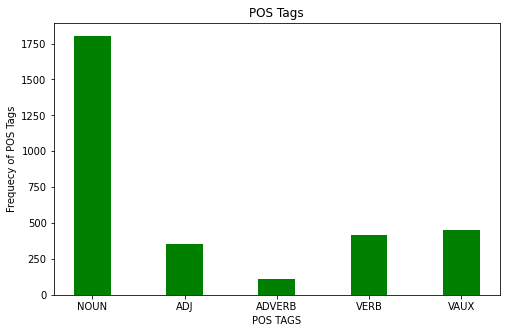

In [ ]:

pos = list(ddist.keys())
values = list(ddist.values())
  
fig = plt.figure(figsize = (8, 5))

plt.bar(pos, values, color ='green',
        width = 0.4)
plt.xlabel("POS TAGS")
plt.ylabel("Frequecy of POS Tags")
plt.title("POS Tags")
plt.show()